In [59]:
# Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from config import api_key
from scipy.stats import linregress

In [31]:
rest_data = pd.read_csv('Insp_Comb_clean_1.csv')
rest_data = rest_data.dropna()
rest_data.head()

,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
0,108 Bar N Grill,98.75,10845 NE Halsey St,Portland,97220,4.0,34,108 Bar N Grill,cheap
1,S'Mores Bar,82.00,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,cheap
2,Taste of Excellence,100.00,1132 SW 19th Ave 101,Portland,97205,4.5,96,1927 S'mores Company,cheap
3,21st Century Pizza,98.00,1221 SW Jefferson St,Portland,97201,4.0,158,21st Century Pizza,cheap
4,"22 Below,",94.50,1728 SW Jefferson St,Portland,97201,4.0,113,22 Below,cheap


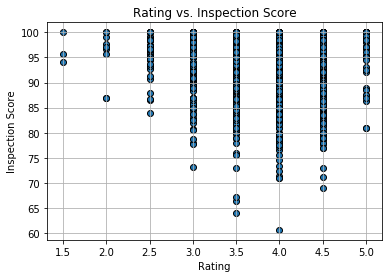

In [32]:
# Build a scatter plot 
plt.scatter(rest_data["Rating"],rest_data["Score"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Rating vs. Inspection Score")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
#plt.ylim(-5,105)
plt.grid (b=True)
plt.savefig("Rating vs Inspection Score.png")
plt.show()

In [51]:
# Grouping data into price category
cheap_data = rest_data.loc[rest_data["price"] == "cheap"]
moderate_data = rest_data.loc[rest_data["price"] == "Mid"]
expensive_data = rest_data.loc[rest_data["price"] == "Expensive"]


,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
0,108 Bar N Grill,98.750000,10845 NE Halsey St,Portland,97220,4.0,34,108 Bar N Grill,cheap
1,S'Mores Bar,82.000000,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,cheap
2,Taste of Excellence,100.000000,1132 SW 19th Ave 101,Portland,97205,4.5,96,1927 S'mores Company,cheap
3,21st Century Pizza,98.000000,1221 SW Jefferson St,Portland,97201,4.0,158,21st Century Pizza,cheap
4,"22 Below,",94.500000,1728 SW Jefferson St,Portland,97201,4.0,113,22 Below,cheap
...,...,...,...,...,...,...,...,...,...
850,YoChoice Self Service Frozen Yogurt,100.000000,4941 NE Fremont St,Portland,97213,3.5,51,YoChoice Yogurt,cheap
851,Your Inn Tavern,94.000000,7004 N Catlin Ave,Portland,97203,4.0,37,Your Inn Tavern,cheap
852,Yukon Tavern,98.333333,5819 SE Milwaukie Ave,Portland,97202,3.5,38,Yukon Tavern,cheap
853,Yurs Restaurant and Lounge,92.250000,717 NW 16th Ave,Portland,97209,4.0,119,Yur's Bar & Grill,cheap


In [84]:

expensive_score = expensive_data["Score"]

# Calculate IQR for Capomulin
expensive_quartiles = expensive_score.quantile([.25,.5,.75])
expensive_lowerq = expensive_quartiles[0.25]
expensive_upperq = expensive_quartiles[0.75]
expensive_iqr = expensive_upperq-expensive_lowerq

print(f"The lower quartile of Expensive Restaurant's Inspection score is: {expensive_lowerq}")
print(f"The upper quartile of Expensive Restaurant's Inspection score is: {expensive_upperq}")
print(f"The interquartile range of Expensive Restaurant's Inspection score is: {expensive_iqr}")
print(f"The median of Expensive Restaurant's Inspection score is: {expensive_quartiles[0.5]} ")

expensive_lower_bound = expensive_lowerq - (1.5*expensive_iqr)
expensive_upper_bound = expensive_upperq + (1.5*expensive_iqr)
print(f"Values below {expensive_lower_bound}  could be outliers for expensive.")
print(f"Values above {expensive_upper_bound} could be outliers for expensive.")

#Check if there is any outlier.
expensive_outlier = expensive_data.loc[(expensive_score < 
        expensive_lower_bound) | (expensive_score > expensive_upper_bound)]

print(f"There could be {len(expensive_outlier)} outliers for expensive.")


# Print the outlier.
expensive_outlier
   

The lower quartile of Expensive Restaurant's Inspection score is: 91.83333333499999
The upper quartile of Expensive Restaurant's Inspection score is: 98.75
The interquartile range of Expensive Restaurant's Inspection score is: 6.916666665000008
The median of Expensive Restaurant's Inspection score is: 96.0 
Values below 81.45833333749998  could be outliers for expensive.
Values above 109.12499999750001 could be outliers for expensive.
There could be 4 outliers for expensive.


,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
2030,Fogo De Chao,72.333333,930 SW 6th Ave,Portland,97204,4.0,1168,Fogo de Chao Brazilian Steakhouse,Expensive
2051,Multnomah Whiskey Library,79.000000,1124 SW Alder St,Portland,97205,4.0,822,Multnomah Whiskey Library,Expensive
2069,Ruths Chris Steak House,79.750000,850 SW Broadway,Portland,97205,4.0,468,Ruth's Chris Steak House,Expensive
2086,"Portland City Grill, #77",78.666667,111 SW 5th Ave,Portland,97204,4.0,578,El Gaucho,Expensive


In [83]:
moderate_score = moderate_data["Score"]

# Calculate IQR for Capomulin
moderate_quartiles = moderate_score.quantile([.25,.5,.75])
moderate_lowerq = moderate_quartiles[0.25]
moderate_upperq = moderate_quartiles[0.75]
moderate_iqr = moderate_upperq-expensive_lowerq

print(f"The lower quartile of moderate Restaurant's Inspection score is: {moderate_lowerq}")
print(f"The upper quartile of moderate Restaurant's Inspection score is: {moderate_upperq}")
print(f"The interquartile range of moderate Restaurant's Inspection score is: {moderate_iqr}")
print(f"The median of moderate Restaurant's Inspection score is: {moderate_quartiles[0.5]} ")

moderate_lower_bound = moderate_lowerq - (1.5*moderate_iqr)
moderate_upper_bound = moderate_upperq + (1.5*moderate_iqr)
print(f"Values below {moderate_lower_bound}  could be outliers for moderate.")
print(f"Values above {moderate_upper_bound} could be outliers for moderate.")

#Check if there is any outlier.
moderate_outlier = moderate_data.loc[(moderate_score < 
        moderate_lower_bound) | (moderate_score > moderate_upper_bound)]

print(f"There could be {len(moderate_outlier)} outliers for moderate.")


moderate_outlier

The lower quartile of moderate Restaurant's Inspection score is: 91.0
The upper quartile of moderate Restaurant's Inspection score is: 98.5
The interquartile range of moderate Restaurant's Inspection score is: 6.666666665000008
The median of moderate Restaurant's Inspection score is: 95.75 
Values below 81.00000000249999  could be outliers for moderate.
Values above 108.49999999750001 could be outliers for moderate.
There could be 52 outliers for moderate.


,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
867,Den on Broadway,71.250000,518 SW Broadway,Portland,97205,4.5,19,A Painted Lady Inn,Mid
873,Akasaru Ramen,80.000000,2712 NE Alberta St,Portland,97211,3.5,159,Akasaru Ramen,Mid
918,Bamboo Grove Hawaiian Grille,80.000000,0515 SW Carolina St,Portland,97239,4.0,446,Bamboo Grove Hawaiian Grille,Mid
922,Hana by Sushi Hana,80.000000,2236 NE Alberta St,Portland,97211,4.5,1012,Bamboo Sushi,Mid
959,Bistro Agnes - Kask,73.000000,527 SW 12th Ave,Portland,97205,4.5,205,Bistro Agnes,Mid
980,Bonsai Restaurant,79.250000,615 SW Broadway Ste 102,Portland,97205,4.0,353,Bonsai By Sake Japanese & Thai Cuisine,Mid
1004,Bun & Pho House,78.500000,2838 SE 82nd Ave,Portland,97266,4.0,45,Bun and Pho House,Mid
1010,Cafe At The J,77.750000,6651 SW Capitol Hwy,Portland,97219,4.5,6,Cafe at the J,Mid
1032,CASA VACA TAQUERIA,76.000000,7800 SW Capitol Hwy,Portland,97219,3.5,128,Casa Vaca Bistro + Bar,Mid
1037,Cha Ba Thai,80.000000,3024 NE Alberta St,Portland,97211,4.0,314,Cha Ba Thai,Mid


In [82]:
cheap_score = cheap_data["Score"]

# Calculate IQR for Capomulin
cheap_quartiles = cheap_score.quantile([.25,.5,.75])
cheap_lowerq = cheap_quartiles[0.25]
cheap_upperq = cheap_quartiles[0.75]
cheap_iqr = cheap_upperq-expensive_lowerq

print(f"The lower quartile of Cheap Restaurant's Inspection score is: {cheap_lowerq}")
print(f"The upper quartile of Cheap Restaurant's Inspection score is: {cheap_upperq}")
print(f"The interquartile range of cheap Restaurant's Inspection score is: {cheap_iqr}")
print(f"The median of cheap Restaurant's Inspection score is: {cheap_quartiles[0.5]} ")

cheap_lower_bound = cheap_lowerq - (1.5*cheap_iqr)
cheap_upper_bound = cheap_upperq + (1.5*cheap_iqr)
print(f"Values below {cheap_lower_bound}  could be outliers for moderate.")
print(f"Values above {cheap_upper_bound} could be outliers for moderate.")

#Check if there is any outlier.
cheap_outlier = cheap_data.loc[(cheap_score < 
        cheap_lower_bound) | (cheap_score > cheap_upper_bound)]

print(f"There could be {len(cheap_outlier)} outliers for moderate.")

cheap_outlier

The lower quartile of Cheap Restaurant's Inspection score is: 93.0
The upper quartile of Cheap Restaurant's Inspection score is: 99.0
The interquartile range of cheap Restaurant's Inspection score is: 7.166666665000008
The median of cheap Restaurant's Inspection score is: 96.75 
Values below 82.25000000249999  could be outliers for moderate.
Values above 109.74999999750001 could be outliers for moderate.
There could be 26 outliers for moderate.


,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
1,S'Mores Bar,82.000000,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,cheap
22,Angel's Donuts and Ice Cream,81.000000,2805 NE Alberta St,Portland,97211,4.0,370,Angel's Donuts & Ice Cream,cheap
64,"Lardo, Grassa & Beer O'Clock",79.333333,1205 SW Washington St,Portland,97205,4.5,82,Beer O'Clock,cheap
71,Bentoz Teriyaki,71.000000,9107 SW Barbur Blvd,Portland,97219,4.0,49,Bentoz Teriyaki,cheap
95,Boom Crepes,81.000000,827 SW 2nd Avenue,Portland,97204,5.0,109,Boom Crepes,cheap
107,Brother's Wings & Bings,77.000000,10075 SW Barbur Blvd 4,Portland,97219,4.5,138,Brother's Wings & Bings,cheap
135,Captain Ankeny's Pizza & Pub,81.833333,116 SW Pine St,Portland,97204,4.0,34,Captain Ankeny's Pizza & Pub,cheap
138,Casa del Sol Mexican Restaurant,79.333333,14324 SE Division St,Portland,97236,4.5,29,Casa Del Sol,cheap
143,Catalinas Restaurant,81.000000,517 NE Killingsworth St,Portland,97211,3.5,83,Catalina's Mexican Restaurant,cheap
152,Chai Yo Restaurant,81.750000,1411 NE Broadway,Portland,97232,3.5,110,Chai Yo Thai Restaurant,cheap


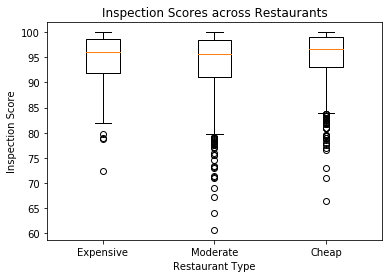

In [57]:
# Generate a box plot of Inspection Scores across Restaurants
data = [expensive_score, moderate_score, cheap_score]
fig1, ax1 = plt.subplots()
ax1.set_title('Inspection Scores across Restaurants')
ax1.boxplot(data, labels = ["Expensive","Moderate","Cheap"])
ax1.set_ylabel('Inspection Score')
ax1.set_xlabel('Restaurant Type')
plt.savefig('Box plot')
plt.show()

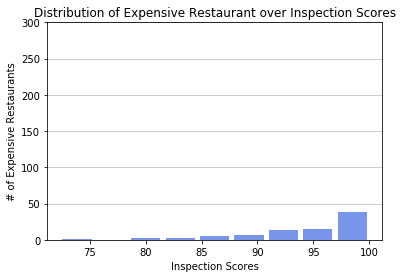

In [80]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x= expensive_score, bins='auto', color='royalblue',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,300)
plt.xlabel('Inspection Scores')
plt.ylabel('# of Expensive Restaurants')
plt.title('Distribution of Expensive Restaurant over Inspection Scores')
plt.savefig("Histogram of Expensive.png")

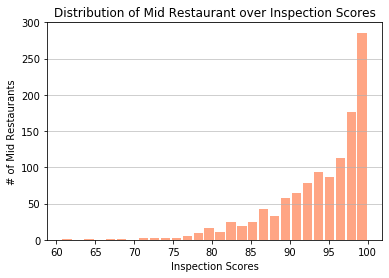

In [79]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x= moderate_score, bins='auto', color='coral',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Inspection Scores')
plt.ylabel('# of Mid Restaurants')
plt.ylim(0,300)
plt.title('Distribution of Mid Restaurant over Inspection Scores')
plt.savefig("Histogram of Mid.png")

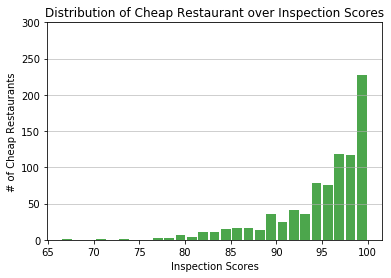

In [78]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x= cheap_score, bins='auto', color='g',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,300)
plt.xlabel('Inspection Scores')
plt.ylabel('# of Cheap Restaurants')
plt.title('Distribution of Cheap Restaurant over Inspection Scores')
plt.savefig("Histogram of Cheap.png")

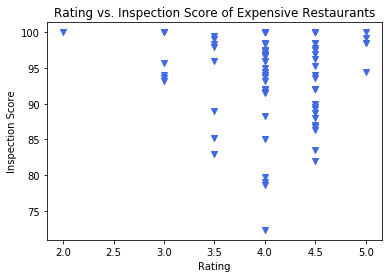

In [50]:
# Build a scatter plot 
plt.scatter(expensive_data["Rating"],expensive_data["Score"], c='royalblue', marker="v", label = 'Expensive')

# Incorporate the other graph properties
plt.title("Rating vs. Inspection Score of Expensive Restaurants")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
plt.savefig("Rating vs Inspection Score of Expensive Restaurants.png")
plt.show()

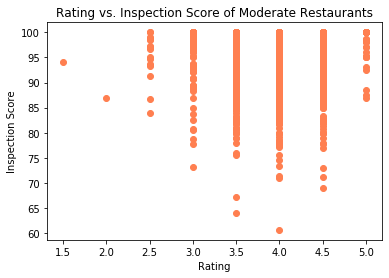

In [35]:
# Build a scatter plot 

plt.scatter(moderate_data["Rating"],moderate_data["Score"],  c='coral', marker="o")

# Incorporate the other graph properties
plt.title("Rating vs. Inspection Score of Moderate Restaurants")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
plt.savefig("Rating vs Inspection Score of Moderate Restaurants.png")
plt.show()

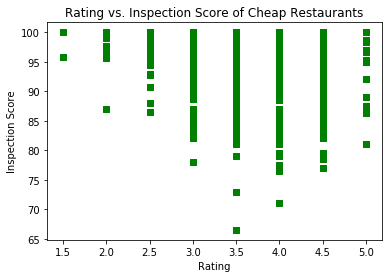

In [36]:
# Build a scatter plot 

plt.scatter(cheap_data["Rating"],cheap_data["Score"],  c='g', marker="s")

# Incorporate the other graph properties
plt.title("Rating vs. Inspection Score of Cheap Restaurants")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")


plt.savefig("Rating vs Inspection Score of Cheap Restaurants.png")
plt.show()

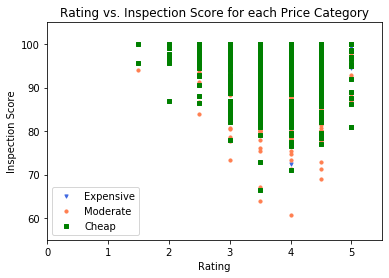

In [37]:
# Build a scatter plot for each data type
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylim([55, 105])
ax1.set_xlim([0,5.5])
ax1.scatter(expensive_data["Rating"], expensive_data["Score"], s= 10, c='royalblue', marker="v", label='Expensive')
ax1.scatter(moderate_data["Rating"],moderate_data["Score"], s=10, c='coral', marker="o", label='Moderate')
ax1.scatter(cheap_data["Rating"],cheap_data["Score"], s=10, c='g', marker="s", label='Cheap')

plt.legend(loc='best')
plt.title("Rating vs. Inspection Score for each Price Category")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
plt.savefig("Rating vs Inspection Score for each category.png")
plt.show()

In [38]:
price_count = rest_data.groupby('price')['Name'].count()
price_category = price_count.keys()

In [44]:
def linear_regression(x_values,y_values,fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (min(x_values),min(y_values)),fontsize=15,color="red")
    plt.xlabel("Rating")
    plt.ylabel("Inspection Score")
    print(f"The r value is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"{fig_name}.png")
    return(plt.show())

The r value is: -0.05349160755176761
The r-squared is: 0.0028613520784723213


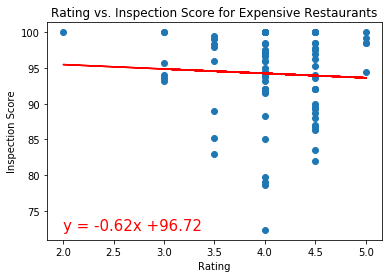

In [45]:
plt.title("Rating vs. Inspection Score for Expensive Restaurants")
linear_regression(expensive_data["Rating"], expensive_data["Score"],"expensive_LR")

The r value is: 0.09238827337181232
The r-squared is: 0.008535593056624727


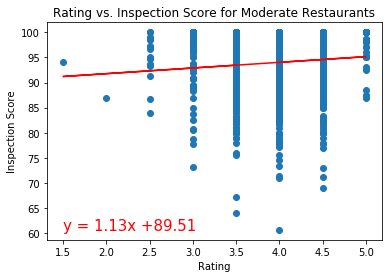

In [41]:
plt.title("Rating vs. Inspection Score for Moderate Restaurants")
linear_regression(moderate_data["Rating"], moderate_data["Score"],"moderate_LR")

The r value is: 0.00890423423079344
The r-squared is: 7.928538723683365e-05


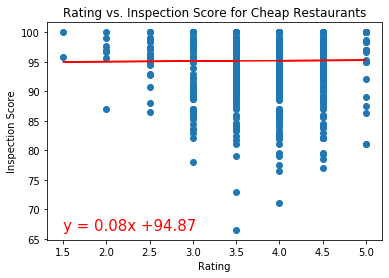

In [42]:
plt.title("Rating vs. Inspection Score for Cheap Restaurants")
linear_regression(cheap_data["Rating"],cheap_data["Score"],"cheap_LR")

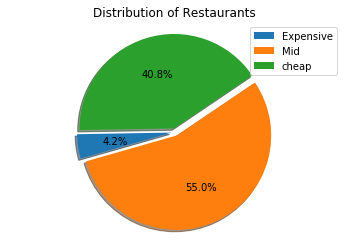

In [43]:
# Generate a pie plot 
explode = (0.04, 0.04, 0.04)
plt.pie(price_count, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=181)
plt.axis("equal")
plt.legend(price_category, loc="best")
plt.title("Distribution of Restaurants")
plt.savefig("piechart.png")
plt.show()